# 3.2 Implementing Logistic Regression from Scratch
### Challenge 3: [Implementating Regression Algorithms from Scratch]

This project is a part of #100MLProjects


**Note:** This is a Fair Draft of the Project, you can find my worsheet here -> [Logistic Regression Worksheet](#). 


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Similar to the Linear Regression Implementation, This implementation will also compare the performance of Scikit Learn Logistic Regression Model and the model I'm building from Scratch.

## DataSet: Breast Cancer Classification Dataset

This dataset is preloaded in Scikit-Learn library, and I'll make use of that.

Dataset has 30 Independent variables.
Dependendent variable has 2 classes - *WDBC-Malignant* and *WDBC-Benign*

We need to build a model that classifies into either of these classes.

Check Sklearn [documentation](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset) for the dataset

In [122]:
dataset = load_breast_cancer()

In [150]:
X = dataset['data']
y = dataset['target']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Scaling the Features

During the implementation process, I compared using ML Models - 1. Model trained with Scaled Features and 2. ML Model trained without Scaling the input features.

There was a visible difference in the performance, Scaling the features really increased the accuracy of the models.

I also experimented with different ranges for MinMaxScaler, but (-1 to 1) yielded better results than other ranges.


In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Scikit-Learn Logistic Regression Model

Building Scikit Learn's Logistic Regression implmentation to set a benchmark for comparison.

In [126]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.98      1.00      0.99       103

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Confusion Matrix:
 [[ 66   2]
 [  0 103]]


Scikit Learn's Linear regression has captured the patterns of the dataset exceptionally well.

It resulted an accuracy of 99%

## Implementing Custom Logistic Regression

### Sigmoid Function

Sigmoid function is one of the activation functions used in binary classification and neural networks.


It results in a score between 0 and 1, which is the confidence score. Based on the threshold we provide, we can classify it to either one of the groups(In this case: Malignant or Benign)

In [127]:
def sigmoid(x):
  return 1/(1 + np.exp(-z))

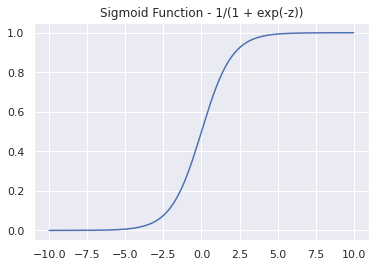

In [128]:
import seaborn as sns
sns.set()
z = np.linspace(-10, 10, 200)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function - 1/(1 + exp(-z))")
plt.show()

In [172]:
class CustomLogisticRegression:
  """ Custom Logistic Regression Implementation.

  Parameters
  ----------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Number of Epochs or Passes over the training set
  random_state : int
    Random number generator seed for random weight initialization.
  
  Attributes:
  -----------
  weights_ : 1D Array
    Array of Bias and Coefficients.
    First element of w_ is the bias, and rest are the coefficients.
  """
  def __init__(self, eta=0.05, n_iter=2000, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def sigmoid(self, z):
    """Compute Sigmoid.

    Parameters
    ----------
    z : {array-like}, shape=[n_samples, n_features]

    Returns
    -------
    sigmoid_value : float
      returns the sigmoid value for given input.
    """
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    """Fit training data.

    Parameters
    ----------
    X : {array-like}, shape=[n_samples, n_features]
      Training vectors where n_samples is the number of datapoints,
      and n_features is the number of features.
    y : array_like, shape=[n_samples]
      Target Values

    Returns
    -------
    self : object
    """
    np.random.seed(self.random_state)
    weights = np.random.rand(X.shape[1])
    N = len(X)
    for _ in range(self.n_iter):
      y_pred = self.sigmoid(np.dot(X, weights))
      weights -= self.eta * np.dot(X.T, y_pred - y) / N
    self.weights = weights
    return self

  def predict(self, X):
    """Make predictions for new datapoint.

    Parameters:
    -----------
    X : {array-like}, shape=[n_samples, n_features]
      Training vectors where n_samples is the number of datapoints,
      and n_features is the number of features.

    Returns:
    --------
    y_pred: {array-like}, shape=[n_samples]
      returns an array of predicted values that either belong to class 0 or 1.
    """
    y_pred = np.dot(X, self.weights)
    return [1 if i > 0.5 else 0 for i in self.sigmoid(y_pred)]

In [173]:
clr = CustomLogisticRegression(random_state=123)
clr = clr.fit(X_train, y_train)

In [174]:
y_pred = clr.predict(X_test)

In [177]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("----------------------------")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 65   3]
 [  2 101]]
----------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.97      0.98      0.98       103

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### Conclusion

Accuracy: 97%

The built Logistic Regression performs really well. Further improvements are needed to tweak up the performance to match sklearn's Logistic Regression. 

## Resources

The following are the resources that I used extensively to learn more about this topic. 

1. [Stats CMU](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)
2. [Logistic Regression from Scratch - Kaggle Notebook](https://www.kaggle.com/jeppbautista/logistic-regression-from-scratch-python)
3. [Becker Nick - Logistic Regression](https://beckernick.github.io/logistic-regression-from-scratch/)
4. [Logistic Regression Theory](https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Logistic-Regression-Theory-988/#:~:text=Logistic%20Regression%20the%20Theory&text=%22Regression%22%20is%20an%20historic%20part,%2C%20good%20or%20bad%20etc..)
5. [Towards DataScience - Logistic Regression](https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17)
6. [Christophm Interpretable ML Book](https://christophm.github.io/interpretable-ml-book/logistic.html)

Also, I extensively used 3Blue1Brown and Khanacademy to brush-up the math knowledge I needed while trying to derive the derivatives for the optimization algorithms.